# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier



---
## Step 0: Load The Data

In [1]:
# Some Utilities

import time
import datetime
import numpy as np
import pickle
from sklearn.utils import shuffle

last_stamp = time.time()

def get_time_since() :
    global last_stamp
    if(last_stamp == 0) :
        last_stamp = time.time()
        
    curr_stamp = time.time()
    elapsed = curr_stamp - last_stamp
    last_stamp = curr_stamp    
    return str(datetime.timedelta(seconds=int(elapsed)))

print("Elapsed:", get_time_since())

Elapsed: 0:00:00


In [2]:
# Load pickled data

# SOLUTION: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']



---

## Step 1: Dataset Summary & Exploration


### Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
from pandas.io.parsers import read_csv

# SOLUTION: Number of training examples
n_train = len(X_train)

# SOLUTION: Number of validation examples
n_validation = len(X_valid)

# SOLUTION: Number of testing examples.
n_test = len(X_test)

# SOLUTION: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# SOLUTION: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

# Get Image distribution
sign_indices, sign_first_index, image_to_sign_index, sign_counts = np.unique(y_train, return_index=True, return_inverse=True, return_counts=True)
sign_names = read_csv("signnames.csv").values[:, 1]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.


Sign# 0 Speed limit (20km/h) Count 180


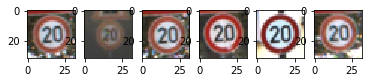

Sign# 1 Speed limit (30km/h) Count 1980


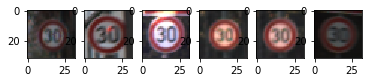

Sign# 2 Speed limit (50km/h) Count 2010


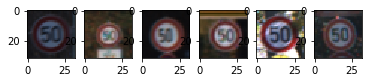

Sign# 3 Speed limit (60km/h) Count 1260


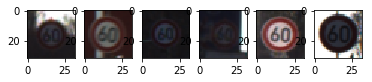

Sign# 4 Speed limit (70km/h) Count 1770


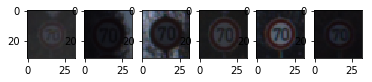

Sign# 5 Speed limit (80km/h) Count 1650


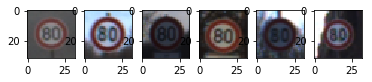

Sign# 6 End of speed limit (80km/h) Count 360


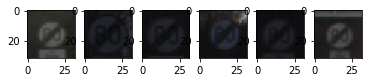

Sign# 7 Speed limit (100km/h) Count 1290


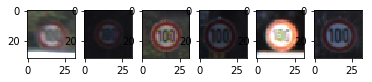

Sign# 8 Speed limit (120km/h) Count 1260


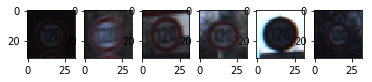

Sign# 9 No passing Count 1320


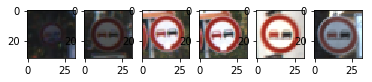

Sign# 10 No passing for vehicles over 3.5 metric tons Count 1800


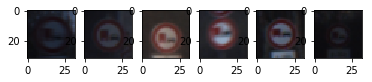

Sign# 11 Right-of-way at the next intersection Count 1170


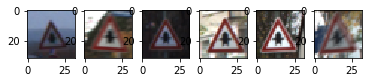

Sign# 12 Priority road Count 1890


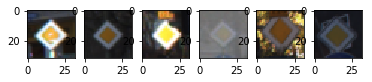

Sign# 13 Yield Count 1920


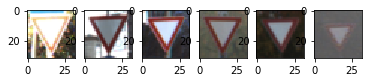

Sign# 14 Stop Count 690


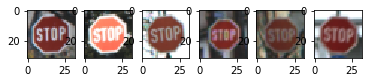

Sign# 15 No vehicles Count 540


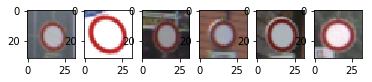

Sign# 16 Vehicles over 3.5 metric tons prohibited Count 360


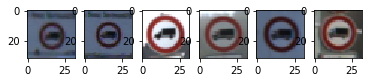

Sign# 17 No entry Count 990


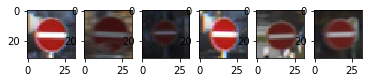

Sign# 18 General caution Count 1080


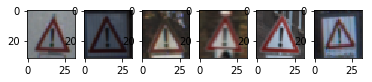

Sign# 19 Dangerous curve to the left Count 180


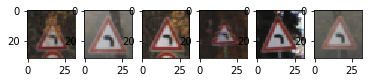

Sign# 20 Dangerous curve to the right Count 300


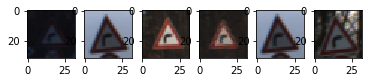

Sign# 21 Double curve Count 270


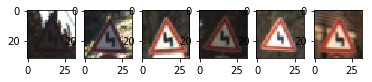

Sign# 22 Bumpy road Count 330


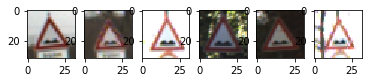

Sign# 23 Slippery road Count 450


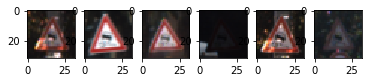

Sign# 24 Road narrows on the right Count 240


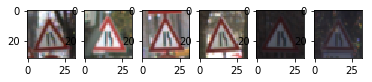

Sign# 25 Road work Count 1350


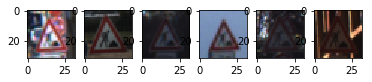

Sign# 26 Traffic signals Count 540


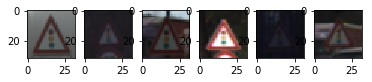

Sign# 27 Pedestrians Count 210


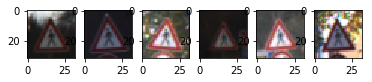

Sign# 28 Children crossing Count 480


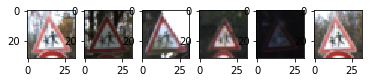

Sign# 29 Bicycles crossing Count 240


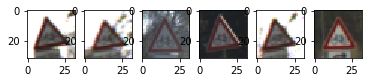

Sign# 30 Beware of ice/snow Count 390


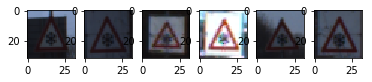

Sign# 31 Wild animals crossing Count 690


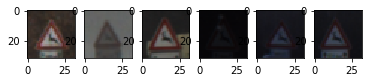

Sign# 32 End of all speed and passing limits Count 210


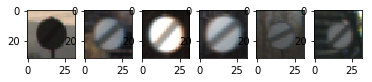

Sign# 33 Turn right ahead Count 599


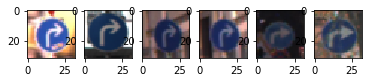

Sign# 34 Turn left ahead Count 360


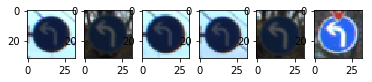

Sign# 35 Ahead only Count 1080


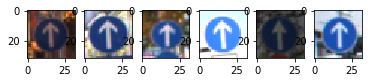

Sign# 36 Go straight or right Count 330


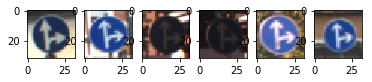

Sign# 37 Go straight or left Count 180


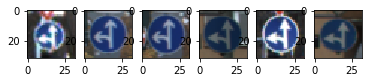

Sign# 38 Keep right Count 1860


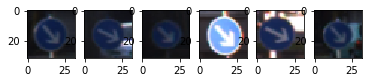

Sign# 39 Keep left Count 270


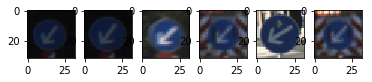

Sign# 40 Roundabout mandatory Count 300


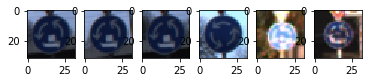

Sign# 41 End of no passing Count 210


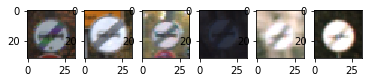

Sign# 42 End of no passing by vehicles over 3.5 metric tons Count 210


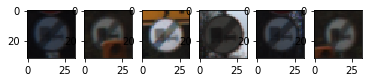

In [4]:
import matplotlib.pyplot as plt

# Look at some images and get their distribution

for sindex, start_id, sign_count in zip(sign_indices, sign_first_index, sign_counts) :
    print("Sign# {} {} Count {}".format(sindex, sign_names[sindex], sign_count))
    fig = plt.figure(figsize=(10,1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    f, axarr = plt.subplots(1, 6)
    for im in range(6) :
        idx = np.random.randint(low=10, high=sign_count)
        image = X_train[start_id+idx].squeeze()
        axarr[im].imshow(image)
    
    plt.show()
    

In [5]:
# Show distribution of training, validations and test sets.
from textwrap import wrap

def plot_distribution(labels, dataset="Training") :
    
    # Generate counts
    sign_indices, sign_first_index, sign_counts = np.unique(labels, return_index=True, return_counts=True)
    
    sign_names = read_csv("signnames.csv").values[:, 1]
    sign_names = [ '\n'.join(wrap(l, 40)) for l in sign_names ]

    bar_width = 1.0
    fig = plt.figure(figsize=(10,12))
    plt.clf()
    barlist = plt.barh(sign_indices, sign_counts, bar_width, align='center', tick_label=sign_names)
    
    if (dataset == "Training") :
        for idx in range(len(sign_indices)) :
            if (sign_counts[idx] < 250) : # too few
                barlist[idx].set_color('orangered')
            elif (sign_counts[idx] < 500) :
                barlist[idx].set_color('yellow')
            else :
                barlist[idx].set_color('mediumseagreen')
    plt.title(dataset+" Image Distrubution - Count:"+str(len(labels)))
    plt.xlabel("Number of Images")
    plt.ylabel("Sign Name")
    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

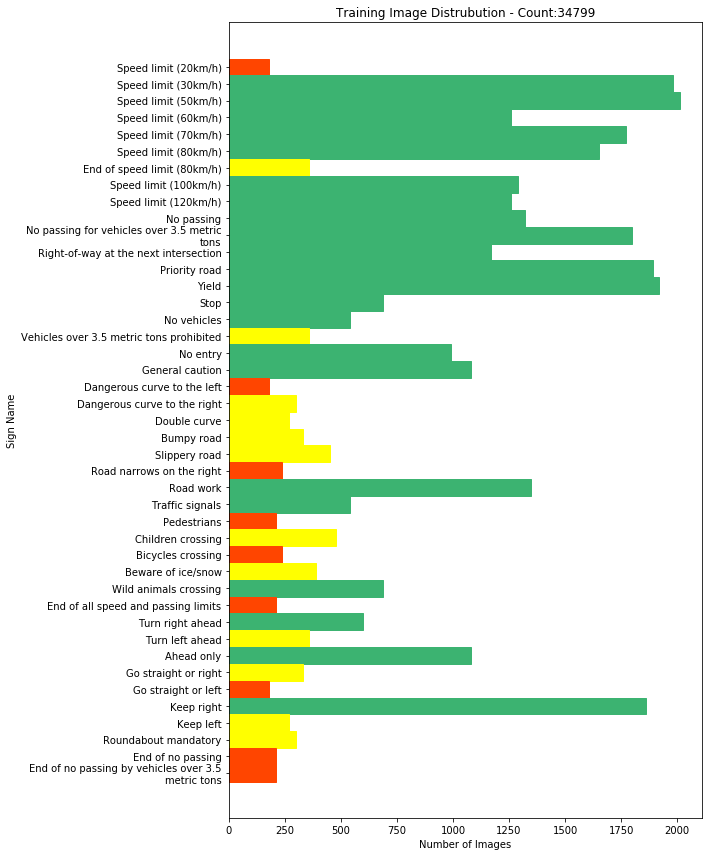

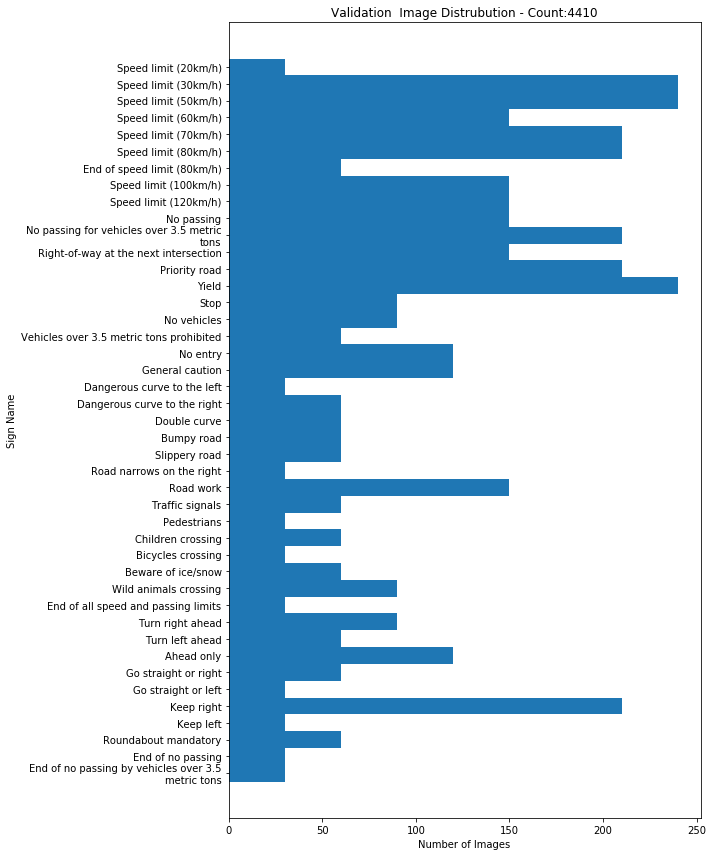

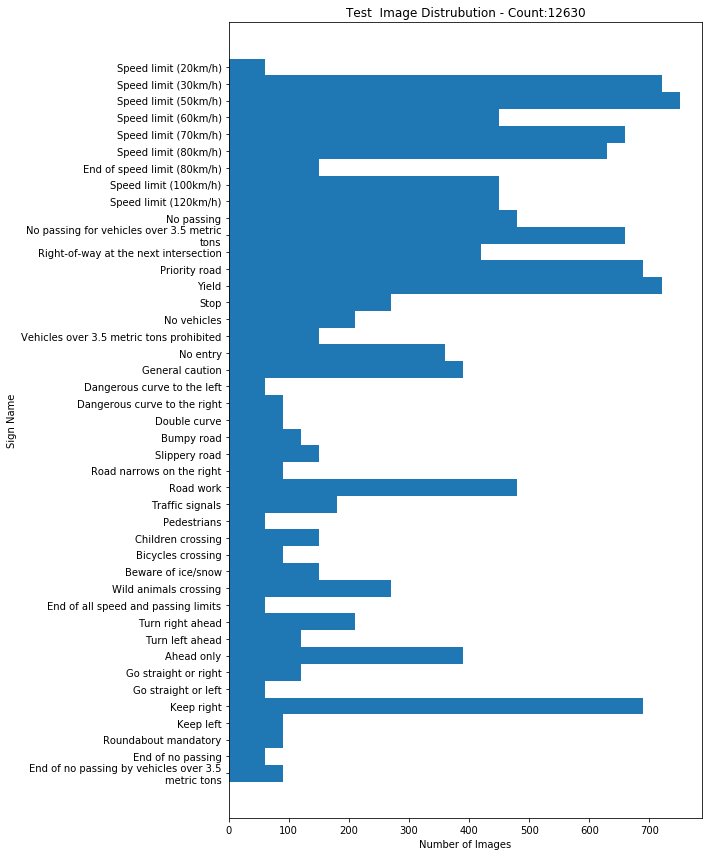

In [6]:
plot_distribution(y_train)
plot_distribution(y_valid, "Validation ")
plot_distribution(y_test, "Test ")


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def prep_normalize(images) :
#    images = (images - 128)/128
    min = images.min()
    max = images.max()
    
    images = (images / (max - min).astype(np.float32))
    return images

def prep_grayscale(images) :
    shape = images.shape

    R, G, B = images[:,:,:,0], images[:,:,:,1], images[:,:,:,2]
    new_images = 0.2989 * R + 0.5870 * G + 0.1140 * B
    new_images = new_images.reshape(new_images.shape + (1,))
    
    return new_images

def preprocess(images) :
    images = prep_normalize(images)
    images = prep_grayscale(images)
    return images

In [8]:
# Preprocess the data and do shuffle to start with

X_train = preprocess(X_train)
X_valid = preprocess(X_valid)
X_test = preprocess(X_test)

X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)
X_test, y_test = shuffle(X_test, y_test)

image_shape = X_train[0].shape


### Model Architecture

In [9]:
### Architecture, various helper routines to create the architecture.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

kernel = 3
conv1_depth = 16
conv2_depth = 32
conv3_depth = 64
conv_stride = 1
pool_stride = 2

def create_params(input_shape) :
    
    # print ("Create_params: input_shape", input_shape)
    X = tf.placeholder(tf.float32, [None, *input_shape])
    y = tf.placeholder(tf.int32, [None])
    keep_prob = tf.placeholder(tf.float32)
    
    return X, y, keep_prob

def maxpool(conv, stride, padding) :
    return tf.nn.max_pool(conv, ksize=stride, strides=stride, padding=padding )

def conv2d(X, weights, biases, stride, pool_stride, padding, keep_prob) :
    
    # equivalent to layers.conv2d
    conv = tf.nn.conv2d(X, weights, [1, stride, stride, 1], padding)
    conv = tf.nn.bias_add(conv, biases)
    conv = tf.nn.relu(conv)
    
    conv = maxpool(conv, [1, pool_stride, pool_stride, 1], padding)
    conv = tf.nn.dropout(conv, keep_prob = keep_prob)
    
    return conv

def TrafficNet(X, keep_prob):

    #
    # Conv1 layer
    #
    
    with tf.variable_scope('conv1'):
        conv1_W = tf.get_variable("weights", shape=(kernel, kernel, 1, conv1_depth), 
                                  initializer=tf.contrib.layers.xavier_initializer())
        conv1_b = tf.Variable(tf.zeros(conv1_depth))
    conv1 = conv2d(X, conv1_W, conv1_b, conv_stride, pool_stride, 'SAME', keep_prob)
    #print("Conv1 -- ", conv1.get_shape())
    
    #
    # Conv2 layer
    #
    with tf.variable_scope('conv2'):
        conv2_W = tf.get_variable("weights", shape=(kernel, kernel, conv1_depth, conv2_depth), 
                                  initializer=tf.contrib.layers.xavier_initializer())
        conv2_b = tf.Variable(tf.zeros(conv2_depth))
    conv2 = conv2d(conv1, conv2_W, conv2_b, conv_stride, pool_stride, 'SAME', keep_prob)
    #print("Conv2 -- ", conv2.get_shape())
    
    #
    # Conv3 layer
    #
    with tf.variable_scope('conv3'):
        conv3_W = tf.get_variable("weights", shape=(kernel, kernel, conv2_depth, conv3_depth), 
                                   initializer=tf.contrib.layers.xavier_initializer())
        conv3_b = tf.Variable(tf.zeros(conv3_depth))
    conv3 = conv2d(conv2, conv3_W, conv3_b, conv_stride, pool_stride, 'SAME', keep_prob)
    #print("Conv3 -- ", conv3.get_shape())
    
    flt0 = flatten(conv3)
    in_shape = (int)(flt0.get_shape()[1])
    out_shape = (int)(in_shape/2)
    
    ##
    ## Fully Connected Layer1
    ##
    
    flt1_w = tf.Variable(tf.truncated_normal(shape=(in_shape, out_shape), mean=0, stddev=0.1))
    flt1_b = tf.Variable(tf.zeros(out_shape))
    flt1   = tf.matmul(flt0, flt1_w) + flt1_b 
    flt1   = tf.nn.relu(flt1)
    # drop out
    flt1   = tf.nn.dropout(flt1, keep_prob = keep_prob )
    
    in_shape = (int)(flt1.get_shape()[1])
    out_shape = (int)(in_shape/2)
    
    ##
    ## Fully Connected Layer2
    ##

    flt2_w = tf.Variable(tf.truncated_normal(shape=(in_shape, out_shape), mean=0, stddev=0.1))
    flt2_b = tf.Variable(tf.zeros(out_shape))
    flt2   = tf.matmul(flt1, flt2_w) + flt2_b
    flt2   = tf.nn.relu(flt2)
    # drop out
    flt2   = tf.nn.dropout(flt2, keep_prob = keep_prob )
    
    in_shape = (int)(flt2.get_shape()[1])
    out_shape = (int)(in_shape/2)

    ##
    ## Fully Connected Layer3
    ##
    
    flt3_w = tf.Variable(tf.truncated_normal(shape=(in_shape, out_shape), mean=0, stddev=0.1))
    flt3_b = tf.Variable(tf.zeros(out_shape))
    flt3   = tf.matmul(flt2, flt3_w) + flt3_b
    flt3   = tf.nn.relu(flt3)
    # drop out
    flt3   = tf.nn.dropout(flt3, keep_prob = keep_prob )
    
    in_shape = (int)(flt3.get_shape()[1])
    out_shape = (int)(in_shape/2)

    ##
    ## Outputs/Logits Layer
    ##
    
    out_w = tf.Variable(tf.truncated_normal(shape=(in_shape, n_classes), mean=0, stddev=0.1))
    out_b = tf.Variable(tf.zeros(n_classes))
    logits   = tf.matmul(flt3, out_w) + out_b    
        
    return logits
    
    

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
X, y, keep_prob = create_params(image_shape)
yoh = tf.one_hot(y, n_classes) # y, one-hot encoded
logits = TrafficNet(X, keep_prob)

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

lrate = 0.001
epochs = 100
batch_size = 128
top_k = 5

saver = tf.train.Saver()

softmax = tf.nn.softmax(logits=logits)
top_k_predictions = tf.nn.top_k(softmax, top_k)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=yoh)
loss = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = lrate)

training = optimizer.minimize(loss)

prediction = tf.equal(tf.argmax(logits,1), tf.argmax(yoh,1))
accuracy_op = tf.reduce_mean(tf.cast(prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    #with tf.Session() as sess :
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_op, feed_dict={X: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def train_model(X_data, y_data) :
    print ("Training..")
    get_time_since()
    with tf.Session() as sess :
        sess.run(tf.global_variables_initializer())
        for e in range(epochs) :
            # SHUFFLE Data..!!
            X_data, y_data = shuffle(X_data, y_data)
            for start in range(0, n_train, batch_size) :
                batch_x, batch_y = X_data[start:start+batch_size], y_data[start:start+batch_size]
                #print("Batch Start", start)
                sess.run(training, feed_dict={X:batch_x, y:batch_y, keep_prob:0.75})
    
            validation_accuracy = evaluate(X_valid, y_valid) 
            print("EPOCH {} ...Validation Accuracy = {:.3f}, Time Taken {}".format(e+1,validation_accuracy, get_time_since()))
            print()

        print("..Training Done")
    
        test_accuracy = evaluate(X_test, y_test)

        print("Test Accuracy", test_accuracy)
        saver.save(sess, "session/saved_session")
    
train_model(X_train, y_train)




Training..
EPOCH 1 ...Validation Accuracy = 0.365, Time Taken 0:00:06

EPOCH 2 ...Validation Accuracy = 0.720, Time Taken 0:00:05

EPOCH 3 ...Validation Accuracy = 0.812, Time Taken 0:00:05

EPOCH 4 ...Validation Accuracy = 0.874, Time Taken 0:00:05

EPOCH 5 ...Validation Accuracy = 0.912, Time Taken 0:00:05

EPOCH 6 ...Validation Accuracy = 0.916, Time Taken 0:00:05

EPOCH 7 ...Validation Accuracy = 0.937, Time Taken 0:00:05

EPOCH 8 ...Validation Accuracy = 0.946, Time Taken 0:00:05

EPOCH 9 ...Validation Accuracy = 0.938, Time Taken 0:00:05

EPOCH 10 ...Validation Accuracy = 0.946, Time Taken 0:00:05

EPOCH 11 ...Validation Accuracy = 0.947, Time Taken 0:00:05

EPOCH 12 ...Validation Accuracy = 0.950, Time Taken 0:00:05

EPOCH 13 ...Validation Accuracy = 0.948, Time Taken 0:00:05

EPOCH 14 ...Validation Accuracy = 0.941, Time Taken 0:00:05

EPOCH 15 ...Validation Accuracy = 0.942, Time Taken 0:00:05

EPOCH 16 ...Validation Accuracy = 0.954, Time Taken 0:00:05

EPOCH 17 ...Validation

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Before Resize


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'const

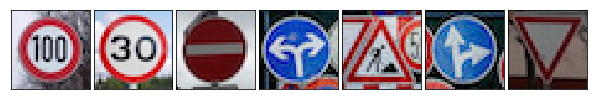

After Resize


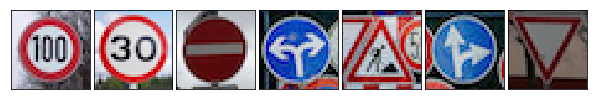

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from skimage import io
from skimage.transform import resize

test_images = np.empty([0, 32, 32, 3], dtype = np.int32)

fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

print("Before Resize")
for i in range(7):
    image = io.imread('new-test-data/Image{0:0>2}'.format(i + 1) + '.png')
    ax = fig.add_subplot(1,7, i+1, xticks=[], yticks=[])
    ax.imshow(image)
    image = resize(image, (32,32,3) )
    test_images = np.append(test_images, [image[:, :, :3]], axis = 0)
plt.show()    

print("After Resize")
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
for im in range(7) :
    ax = fig.add_subplot(1,7, im+1, xticks=[], yticks=[])
    ax.imshow(test_images[im])
    
plt.show()




### Predict the Sign Type for Each Image

In [13]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Pre-process the test images

X_custom = preprocess(test_images)

y_custom = np.array([7, 1, 17, 99, 25, 36, 13 ])

In [14]:
# Run prediction for the new test set
with tf.Session() as sess :
    saver.restore(sess, "./session/saved_session")
    custom_prediction = sess.run(prediction, feed_dict={X: X_custom, y: y_custom, keep_prob:1.0})
    softmax_top_k_predictions = sess.run(top_k_predictions, feed_dict={X: X_custom, keep_prob:1.0})

In [15]:

for i in range(len(y_custom)) :
    pred = softmax_top_k_predictions[1][i][0]
    if (y_custom[i] == 99) :
        name = "Untrained"
    else :
        name = sign_names[y_custom[i]]
    print(" Result {0: <2} Prediction {1: <2} ({2: <20}) Actual {3: <2} ({4: <20})".format( (pred == y_custom[i]), pred,
                                           sign_names[pred],
                                           y_custom[i],
                                           name))

 Result 0  Prediction 5  (Speed limit (80km/h)) Actual 7  (Speed limit (100km/h))
 Result 1  Prediction 1  (Speed limit (30km/h)) Actual 1  (Speed limit (30km/h))
 Result 1  Prediction 17 (No entry            ) Actual 17 (No entry            )
 Result 0  Prediction 14 (Stop                ) Actual 99 (Untrained           )
 Result 1  Prediction 25 (Road work           ) Actual 25 (Road work           )
 Result 1  Prediction 36 (Go straight or right) Actual 36 (Go straight or right)
 Result 1  Prediction 13 (Yield               ) Actual 13 (Yield               )


### Analyze Performance

In [16]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess :
    saver.restore(sess, "./session/saved_session")
    accuracy = evaluate(X_custom, y_custom)
    print("Accuracy on the Custom Images", accuracy)

Accuracy on the Custom Images 0.714285731316


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 



Prediction: 5  , Probablity:  0.9612644910812378
Prediction: 2  , Probablity:  0.027884675189852715
Prediction: 7  , Probablity:  0.00634510163217783
Prediction: 3  , Probablity:  0.002374258590862155
Prediction: 8  , Probablity:  0.0011767109390348196


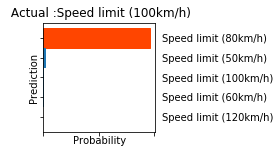

----------------------------------------------
Prediction: 1  , Probablity:  0.9999516010284424
Prediction: 2  , Probablity:  4.845438525080681e-05
Prediction: 4  , Probablity:  2.8739350454998203e-08
Prediction: 5  , Probablity:  1.1620353984609366e-10
Prediction: 15 , Probablity:  6.184037310008605e-11


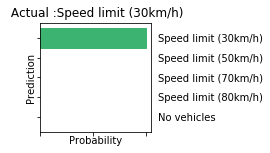

----------------------------------------------
Prediction: 17 , Probablity:  1.0 
Prediction: 14 , Probablity:  1.165679052046327e-25
Prediction: 12 , Probablity:  5.764514759166911e-29
Prediction: 10 , Probablity:  4.258925946452927e-29
Prediction: 9  , Probablity:  1.0072247983382364e-29


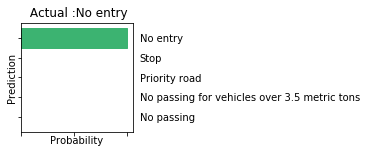

----------------------------------------------
Prediction: 14 , Probablity:  0.5502846240997314
Prediction: 13 , Probablity:  0.3339013159275055
Prediction: 12 , Probablity:  0.060917921364307404
Prediction: 1  , Probablity:  0.018204350024461746
Prediction: 35 , Probablity:  0.01328835915774107


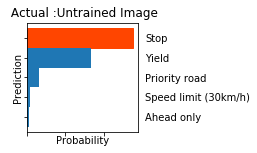

----------------------------------------------
Prediction: 25 , Probablity:  1.0 
Prediction: 22 , Probablity:  4.771009715272224e-36
Prediction: 31 , Probablity:  2.2502537270954726e-37
Prediction: 0  , Probablity:  0.0 
Prediction: 1  , Probablity:  0.0 


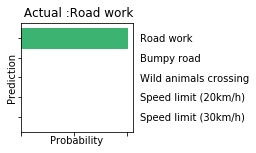

----------------------------------------------
Prediction: 36 , Probablity:  1.0 
Prediction: 38 , Probablity:  2.1336670494656595e-13
Prediction: 25 , Probablity:  1.9826417525965756e-13
Prediction: 35 , Probablity:  1.1698803004892705e-13
Prediction: 20 , Probablity:  6.20880435822993e-14


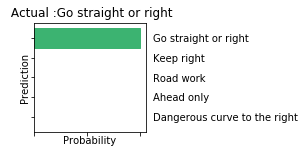

----------------------------------------------
Prediction: 13 , Probablity:  1.0 
Prediction: 1  , Probablity:  1.0256778684466162e-35
Prediction: 12 , Probablity:  3.442555139594995e-37
Prediction: 0  , Probablity:  0.0 
Prediction: 2  , Probablity:  0.0 


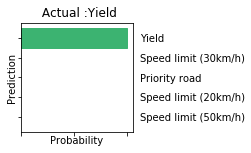

----------------------------------------------


In [17]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

for i in range(len(y_custom)) :
    predicts = []
    probs = []
    labels = []
    for j in range(5) :
        prob = softmax_top_k_predictions[0][i][j]
        pred = softmax_top_k_predictions[1][i][j]
        probs.append(prob)
        predicts.append(pred)
        labels.append(sign_names[pred]) 
        print ("Prediction: {0: <3}, Probablity: {1: < 5}".format(pred, prob))
        matched = (softmax_top_k_predictions[1][i][0] == y_custom[i])
 
    fig = plt.figure(figsize=(2,2))
    barlist = plt.barh(np.arange(5)+.5, probs, 1.0, align='center')
    idx = probs.index(max(probs))
    if (matched) :
        barlist[idx].set_color('mediumseagreen')
    else :
        barlist[idx].set_color('orangered')
    if (y_custom[i] == 99) :
        name = "Untrained Image"
    else :
        name = sign_names[y_custom[i]]
    plt.title(" Actual :"+name)
    plt.xlabel("Probability")
    plt.ylabel("Prediction")
    plt.yticks(np.arange(5)+.5, labels)
    plt.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='off')
    plt.gca().invert_yaxis()

    plt.show()
    print("----------------------------------------------")
    
    

### Project Writeup

Project writeup is available [Here](https://github.com/gvogety/udacity-sdcar-traffic-signs/blob/master/Project_Report.md)